# Прогнозирование цен потребительского ритейла по тестовой выборке на основе глубоких нейронных сетей
__Выполнил:__ *Домченко Максим*

__Студент группы:__ *РИМ-130962*

### Шаг 1: Загрузка датасета и общая информация

In [1]:
# 🔹 Шаг 1: Загрузка объединённого датафрейма
# Цель: Загрузить финальный объединённый датафрейм с логарифмом цен, календарными и категориальными признаками для EDA.

import pandas as pd
import os

# Путь к финальному датасету
data_path = '../data/processed/m5_features_processed.parquet'

# Загрузка объединённого датафрейма
df = pd.read_parquet(data_path)

In [2]:
# Просмотр первых строк и структуры таблицы
display(df.head(5))
display(df.info())
display(df.describe(include='all'))

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,wm_yr_wk_x,sell_price,...,rolling_std_14,rolling_mean_28,rolling_mean_56,rolling_mean_365,rolling_min_365,price_max_365,price_norm,price_momentum_7,price_pct_change_7,is_discounted
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,11101,9.58,...,0.0,NaN,0.0,0.0,0.0,9.58,1.000000,0.0,0.0,0
1,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_2,0,11101,0.70,...,0.0,0.0,0.0,0.0,0.0,9.58,0.073069,0.0,0.0,1
2,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_3,0,11101,0.57,...,0.0,0.0,0.0,0.0,0.0,9.58,0.059499,0.0,0.0,1
3,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_4,0,11101,0.48,...,0.0,0.0,0.0,0.0,0.0,9.58,0.050104,0.0,0.0,1
4,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_5,0,11101,4.88,...,0.0,0.0,0.0,0.0,0.0,9.58,0.509395,0.0,0.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58327370 entries, 0 to 58327369
Data columns (total 39 columns):
 #   Column              Dtype         
---  ------              -----         
 0   id                  category      
 1   item_id             category      
 2   dept_id             category      
 3   cat_id              category      
 4   store_id            category      
 5   state_id            category      
 6   d                   object        
 7   sales               int16         
 8   wm_yr_wk_x          int16         
 9   sell_price          float32       
 10  date                datetime64[ns]
 11  wm_yr_wk_y          int16         
 12  weekday             category      
 13  wday                int8          
 14  month               int8          
 15  year                int16         
 16  event_name_1        category      
 17  event_type_1        category      
 18  event_name_2        category      
 19  event_type_2        category      
 20  

None

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,wm_yr_wk_x,sell_price,...,rolling_std_14,rolling_mean_28,rolling_mean_56,rolling_mean_365,rolling_min_365,price_max_365,price_norm,price_momentum_7,price_pct_change_7,is_discounted
count,58327370,58327370,58327370,58327370,58327370,58327370,58327370,5.832737e+07,5.832737e+07,5.832737e+07,...,5.832737e+07,5.829688e+07,5.832737e+07,5.832737e+07,5.832737e+07,5.832737e+07,5.832737e+07,5.832737e+07,5.832737e+07,5.832737e+07
unique,30490,3049,7,3,10,3,1913,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,FOODS_3_827_WI_3_validation,FOODS_3_827,FOODS_3,FOODS,CA_1,CA,d_1913,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1913,19130,15743990,27489810,5832737,23330948,30490,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.126322e+00,1.133919e+04,4.446165e+00,...,9.632273e-01,1.122878e+00,1.118638e+00,1.081355e+00,6.760240e-03,2.519751e+01,1.850078e-01,-1.478547e-02,7.431343e-01,9.925676e-01
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,1.110100e+04,1.000000e-02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.200000e-01,3.227889e-04,-9.965000e+01,-9.996662e-01,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,1.121700e+04,2.180000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,4.383562e-02,0.000000e+00,1.998000e+01,8.632597e-02,-2.070000e+00,-4.658120e-01,1.000000e+00
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,1.133300e+04,3.420000e+00,...,5.345225e-01,3.214286e-01,3.214286e-01,3.369863e-01,0.000000e+00,2.698000e+01,1.380078e-01,0.000000e+00,0.000000e+00,1.000000e+00
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,1.144800e+04,5.840000e+00,...,1.176697e+00,1.035714e+00,1.035714e+00,1.002740e+00,0.000000e+00,2.997000e+01,2.325659e-01,2.040000e+00,9.034909e-01,1.000000e+00
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.630000e+02,1.161300e+04,1.073200e+02,...,2.110041e+02,4.427500e+02,3.980000e+02,3.980000e+02,3.600000e+02,1.073200e+02,1.000000e+00,1.025500e+02,1.747000e+03,1.000000e+00


#### 📌 Шаг 1: Загрузка объединённого датафрейма — выводы

- Загрузился датафрейм на **58+ миллионов строк** и **39 колонок**.
- Данные включают как **продажи**, так и **цены**, календарные признаки, лаги и скользящие окна.
- Целевая переменная `sell_price` присутствует, а также её производные (`price_norm`, `price_momentum_7`, `price_pct_change_7` и др.).
- Есть пропуски (например, в `rolling_mean_28`), что потребует дополнительной обработки на этапе обучения моделей.
- Оптимизированные типы данных (`category`, `int8`, `float32`) позволяют экономно работать с объёмом в ~5.8 GB.


### Шаг 2: Добавление логарифма цены и анализ распределения целевой переменной

In [3]:
# 🔹 Шаг 2: Добавление логарифма цены и анализ распределения целевой переменной
# Цель: Создать две версии таргета (сырую и логарифмическую) и построить гистограммы их распределения
# для оценки формы, хвостов и пригодности для различных типов моделей.

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import gc

# Создание переменных-таргетов
df["y_raw"] = df["sell_price"]
df["y_log"] = np.log1p(df["y_raw"])  # log(1 + price)

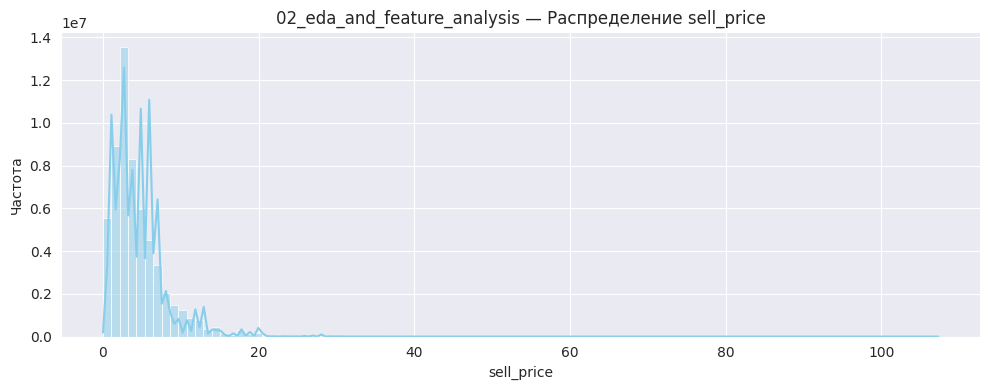

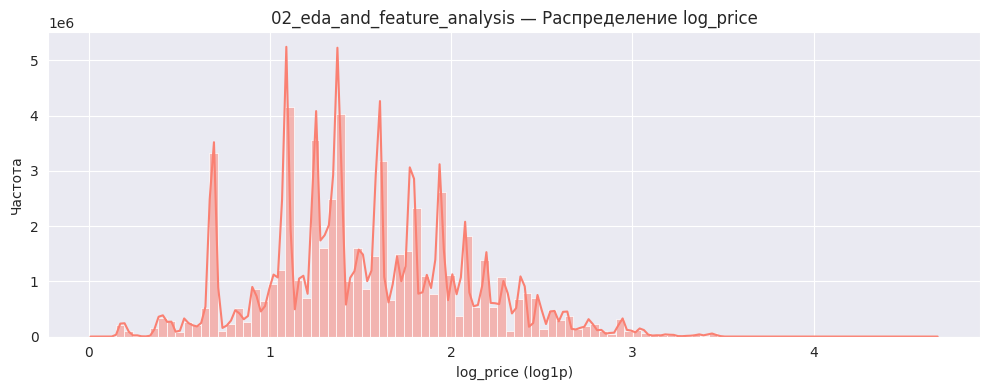

8490

In [4]:
# Создание директории для сохранения графиков
os.makedirs("../data/plots", exist_ok=True)

# --- График распределения исходной цены ---
plt.figure(figsize=(10, 4))
sns.histplot(df["y_raw"], bins=100, kde=True, color='skyblue')
plt.title("02_eda_and_feature_analysis — Распределение sell_price")
plt.xlabel("sell_price")
plt.ylabel("Частота")
plt.tight_layout()
plt.savefig("../data/plots/02_eda_and_feature_analysis_y_raw_dist.png")
plt.show()
plt.close()

# Очистка памяти после первого графика
gc.collect()

# --- График распределения логарифма цены ---
plt.figure(figsize=(10, 4))
sns.histplot(df["y_log"], bins=100, kde=True, color='salmon')
plt.title("02_eda_and_feature_analysis — Распределение log_price")
plt.xlabel("log_price (log1p)")
plt.ylabel("Частота")
plt.tight_layout()
plt.savefig("../data/plots/02_eda_and_feature_analysis_y_log_dist.png")
plt.show()
plt.close()

# Очистка памяти после второго графика
gc.collect()


#### 📌 Шаг 2: Анализ распределения целевой переменной — выводы

- Распределение `sell_price` сильно **смещено вправо** — это типично для цен в ритейле: много недорогих товаров и редкие "пики" выше $50.
- Логарифмическое преобразование `log_price = log1p(sell_price)` значительно **сглаживает хвосты** и приближает распределение к нормальному.
- Это важно, потому что:
  - **Лог-цены** предпочтительны для моделей, чувствительных к масштабам и выбросам (линейная регрессия, ARIMA, нейросети).
  - **Исходные цены** (`sell_price`) лучше подходят для деревьев и бустинга (XGBoost, LightGBM), которые устойчивы к масштабу и выбросам.
- Поэтому мы сразу сохраняем две версии целевой переменной:
  - `y_raw = sell_price`
  - `y_log = log1p(sell_price)`

Это обеспечит гибкость при обучении и сравнении различных моделей на следующих этапах.


### Шаг 3: Построение QQ-плотов для оценки нормальности распределения

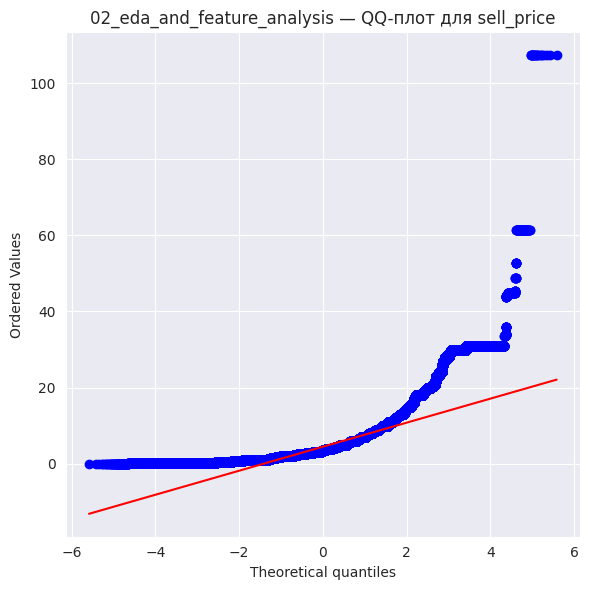

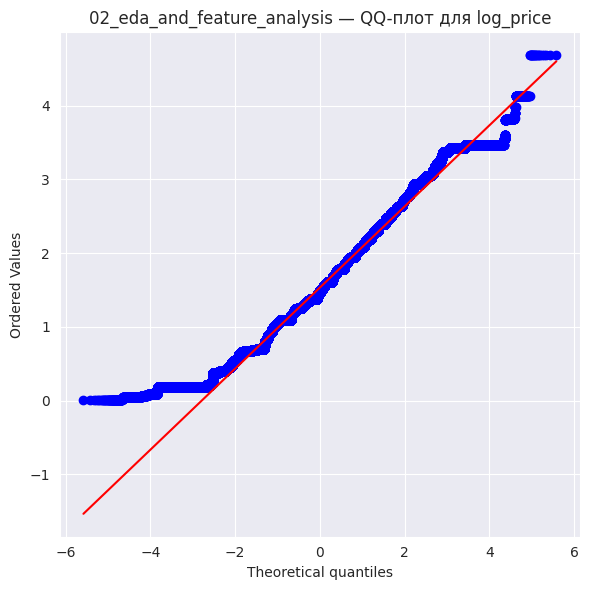

3249

In [5]:
# 🔹 Шаг 3: Построение QQ-плотов для оценки нормальности распределения
# Цель: Сравнить поведение распределения исходной цены и её логарифма с нормальным распределением
# с помощью графиков квантиль-квантиль (QQ-плотов). Это помогает обосновать, что log_price ближе к нормальному.

import scipy.stats as stats
import matplotlib.pyplot as plt
import os
import gc

# --- QQ-плот для sell_price (y_raw) ---
plt.figure(figsize=(6, 6))
stats.probplot(df["y_raw"].dropna(), dist="norm", plot=plt)
plt.title("02_eda_and_feature_analysis — QQ-плот для sell_price")
plt.tight_layout()
plt.savefig("../data/plots/02_eda_and_feature_analysis_qq_y_raw.png")
plt.show()
plt.close()
gc.collect()

# --- QQ-плот для log_price (y_log) ---
plt.figure(figsize=(6, 6))
stats.probplot(df["y_log"].dropna(), dist="norm", plot=plt)
plt.title("02_eda_and_feature_analysis — QQ-плот для log_price")
plt.tight_layout()
plt.savefig("../data/plots/02_eda_and_feature_analysis_qq_y_log.png")
plt.show()
plt.close()
gc.collect()


#### 📌 Шаг 3: QQ-плоты — проверка нормальности целевой переменной

- QQ-плот для `sell_price` показывает выраженное отклонение от нормального распределения:
  - сильная правосторонняя асимметрия;
  - высокие значения ("пики") заметно отходят от теоретической линии.

- Для `log_price` ситуация значительно лучше:
  - большинство точек лежат вдоль прямой;
  - хвосты сглажены, выбросы значительно менее выражены.

📌 Это подтверждает, что логарифмическое преобразование делает распределение ближе к нормальному и может улучшить работу моделей, чувствительных к форме распределения (например, линейных моделей, MSE-базированных нейросетей).

💡 Рекомендация: оставить в пайплайне обе версии целевой переменной (`y_raw` и `y_log`), чтобы сравнивать их влияние на различные модели.


### Шаг 4: Boxplot цен и лог-цен по магазинам и категориям

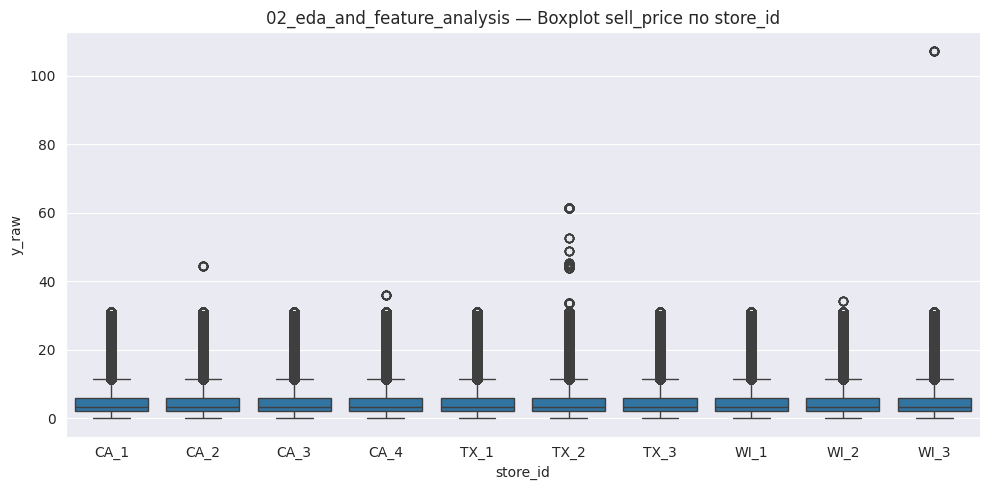

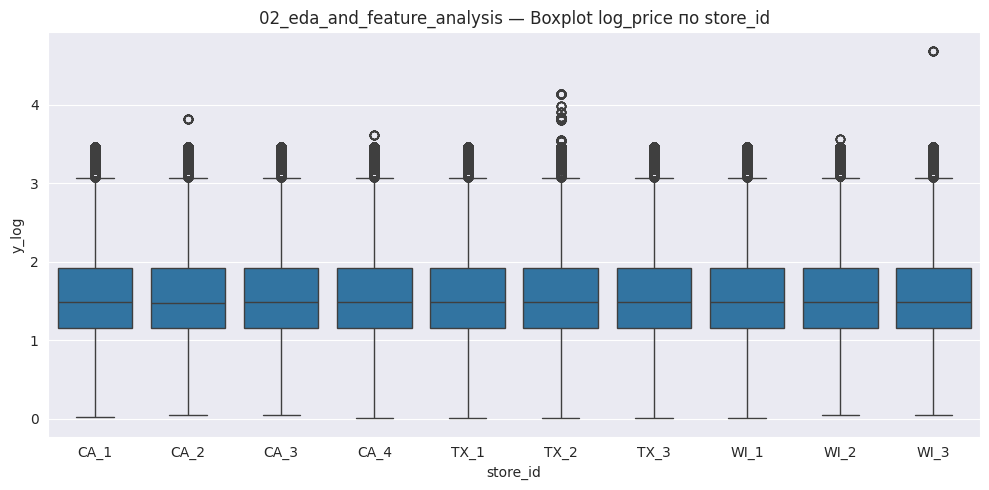

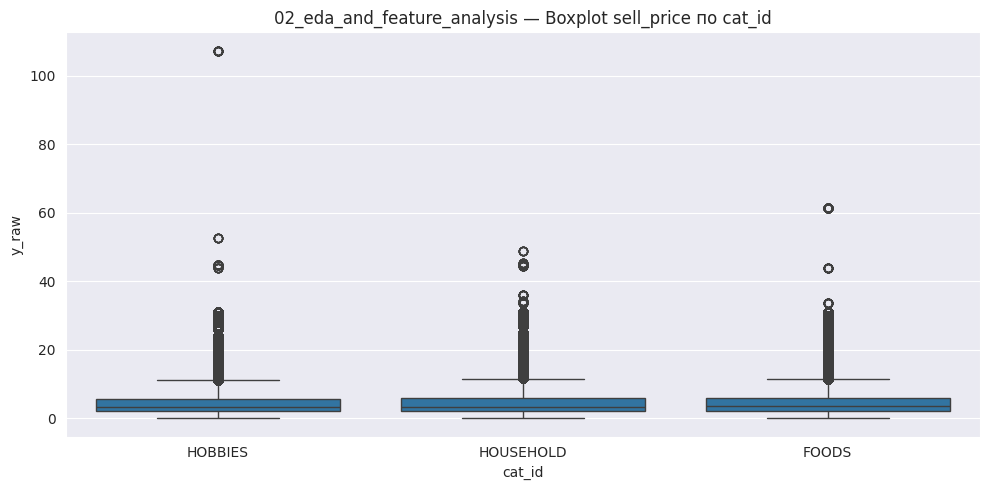

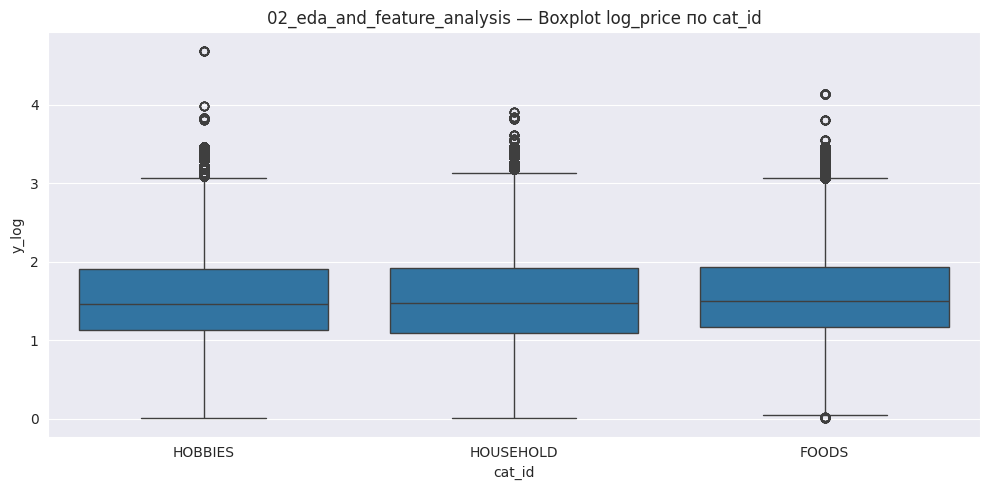

3841

In [6]:
# 🔹 Шаг 4: Boxplot цен и лог-цен по магазинам и категориям
# Цель: Сравнить распределения цен и логарифма цен между разными магазинами и категориями.
# Это позволяет увидеть различия в масштабах, выбросах и структуре по сегментам.

import matplotlib.pyplot as plt
import seaborn as sns
import os
import gc

os.makedirs("../data/plots", exist_ok=True)

# --- Boxplot: sell_price по store_id ---
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="store_id", y="y_raw")
plt.title("02_eda_and_feature_analysis — Boxplot sell_price по store_id")
plt.tight_layout()
plt.savefig("../data/plots/02_eda_and_feature_analysis_boxplot_y_raw_by_store.png")
plt.show()
plt.close()
gc.collect()

# --- Boxplot: log_price по store_id ---
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="store_id", y="y_log")
plt.title("02_eda_and_feature_analysis — Boxplot log_price по store_id")
plt.tight_layout()
plt.savefig("../data/plots/02_eda_and_feature_analysis_boxplot_y_log_by_store.png")
plt.show()
plt.close()
gc.collect()

# --- Boxplot: sell_price по cat_id ---
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="cat_id", y="y_raw")
plt.title("02_eda_and_feature_analysis — Boxplot sell_price по cat_id")
plt.tight_layout()
plt.savefig("../data/plots/02_eda_and_feature_analysis_boxplot_y_raw_by_cat.png")
plt.show()
plt.close()
gc.collect()

# --- Boxplot: log_price по cat_id ---
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="cat_id", y="y_log")
plt.title("02_eda_and_feature_analysis — Boxplot log_price по cat_id")
plt.tight_layout()
plt.savefig("../data/plots/02_eda_and_feature_analysis_boxplot_y_log_by_cat.png")
plt.show()
plt.close()
gc.collect()


#### 📌 Шаг 4: Boxplot цен по магазинам и категориям — выводы

- Распределения `sell_price` по магазинам (`store_id`) заметно различаются по масштабам и количеству выбросов:
  - Некоторые магазины (например, TX_2 и WI_3) имеют более высокие выбросы.
  - Основная масса цен находится в диапазоне до $10.

- Логарифмирование (график `log_price`) существенно **сглаживает различия** между магазинами:
  - Ящики (межквартильный диапазон) становятся визуально ближе по масштабу.
  - Выбросы становятся менее экстремальными.

- Аналогичная картина наблюдается и по категориям (`cat_id`):
  - В сыром виде категории **FOODS** и **HOUSEHOLD** содержат аномально высокие значения.
  - После лог-преобразования — распределения становятся более симметричными и сопоставимыми между категориями.

📌 Эти графики подтверждают, что логарифмирование полезно не только для глобального распределения, но и для **снижения дисбаланса между сегментами**. Это улучшает стабильность моделей, особенно при работе с категориальными признаками.


### Шаг 5: Анализ сезонности цен по времени

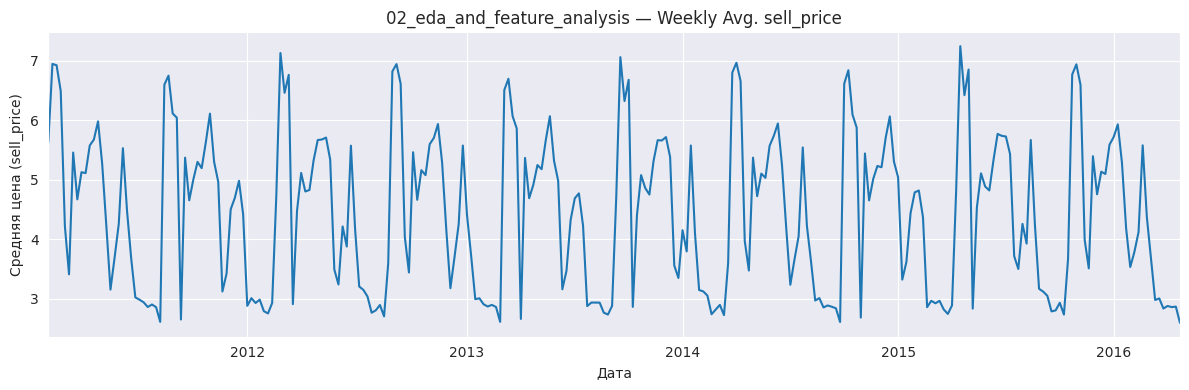

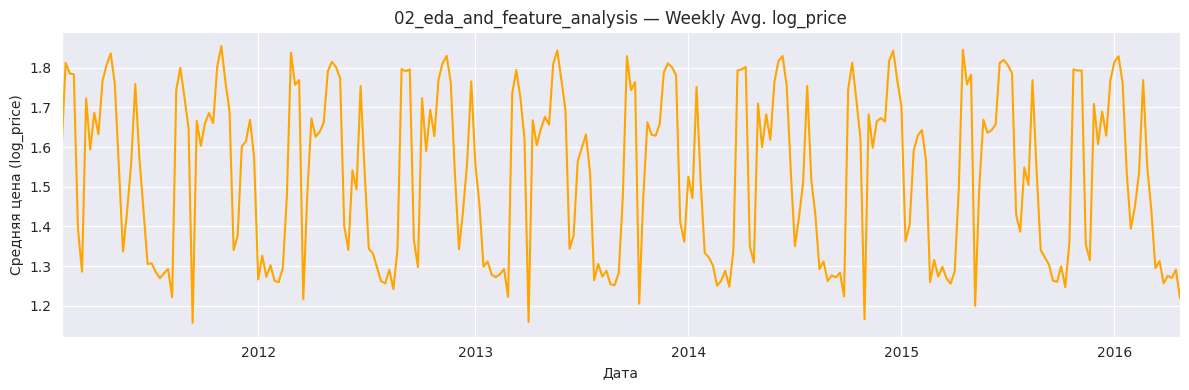

4604

In [7]:
# 🔹 Шаг 5: Анализ сезонности цен по времени
# Цель: Построить график средней цены по неделям, чтобы выявить инфляционные тренды и годовые циклы.

import matplotlib.pyplot as plt
import os
import gc

# Убедимся, что 'date' в индексе для ресемплинга
df_time = df[["date", "y_raw", "y_log"]].copy()
df_time = df_time.set_index("date")

# Агрегация: средняя цена по неделям
weekly_prices = df_time.resample("W").mean()

# --- График средней sell_price во времени ---
plt.figure(figsize=(12, 4))
weekly_prices["y_raw"].plot()
plt.title("02_eda_and_feature_analysis — Weekly Avg. sell_price")
plt.ylabel("Средняя цена (sell_price)")
plt.xlabel("Дата")
plt.tight_layout()
plt.savefig("../data/plots/02_eda_and_feature_analysis_seasonality_y_raw.png")
plt.show()
plt.close()
gc.collect()

# --- График средней log_price во времени ---
plt.figure(figsize=(12, 4))
weekly_prices["y_log"].plot(color='orange')
plt.title("02_eda_and_feature_analysis — Weekly Avg. log_price")
plt.ylabel("Средняя цена (log_price)")
plt.xlabel("Дата")
plt.tight_layout()
plt.savefig("../data/plots/02_eda_and_feature_analysis_seasonality_y_log.png")
plt.show()
plt.close()
gc.collect()


#### 📌 Шаг 5: Анализ сезонности цен — выводы

- Наблюдается **чётко выраженная годовая сезонность**: резкие всплески цен происходят регулярно, примерно в одно и то же время года.
- Такие пики, вероятно, связаны с крупными распродажами (например, Black Friday, рождественский сезон) или маркетинговыми циклами.
- Уровень цен в логарифмической шкале (`log_price`) также сохраняет сезонную структуру, но становится **менее чувствителен к экстремальным значениям** и выглядит сглаженным.
- Инфляционного тренда за 5 лет явно не наблюдается — средняя цена остаётся в стабильном диапазоне.

📌 Эти наблюдения важны:
- для обоснования использования временных признаков (неделя, месяц, праздники и т.д.);
- для выбора моделей с поддержкой сезонности (Prophet, Holt-Winters, RNN, TFT и т.д.).


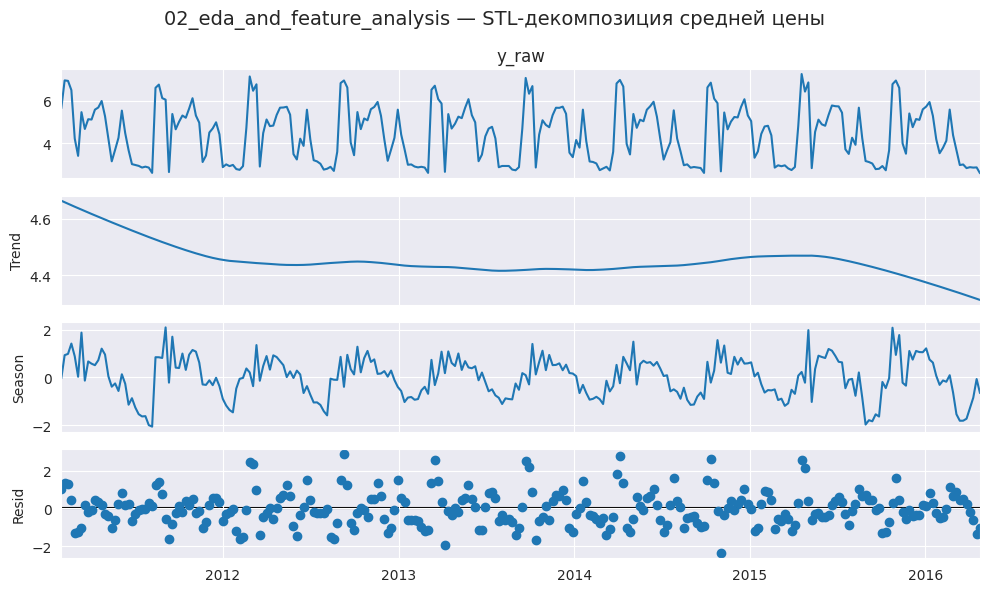

6

In [8]:
# 🔹 Шаг 5.1: STL-декомпозиция средней цены по неделям
# Цель: Разложить weekly_avg(y_raw) на тренд, сезонность и остаток.
# Это наглядно показывает, что тренд почти плоский, а сезонная компонента — доминирующая.

from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt
import os
import gc

# STL требует отсутствия пропусков
weekly = df[["date", "y_raw"]].copy()
weekly = weekly.set_index("date").resample("W").mean().dropna()

# Декомпозиция: период сезонности = 52 недели
stl = STL(weekly["y_raw"], period=52)
res = stl.fit()

# Визуализация компонентов
fig = res.plot()
fig.suptitle("02_eda_and_feature_analysis — STL-декомпозиция средней цены", fontsize=14)
fig.set_size_inches(10, 6)
plt.tight_layout()
plt.savefig("../data/plots/02_eda_and_feature_analysis_stl_y_raw.png")
plt.show()
plt.close()
gc.collect()


#### 📌 Шаг 5.1: STL-декомпозиция средней цены — выводы

- Временной ряд средней цены был разложен на три компоненты: **тренд**, **сезонность** и **остаток**.
- Компонента **Trend** практически плоская: это подтверждает, что инфляция или устойчивый рост цен **отсутствуют**.
- Компонента **Season** демонстрирует чёткие годовые циклы — регулярные всплески с периодом ≈52 недели.
- Компонента **Residual** представляет случайный шум без выраженной структуры.

📌 Вывод:
Основной вклад в вариативность цены вносит **сезонная промо-активность**, а не тренд.
Это оправдывает:
- использование сезонных моделей (Prophet, Holt-Winters);
- добавление лагов 52 недели;
- генерацию синусоидальных признаков.


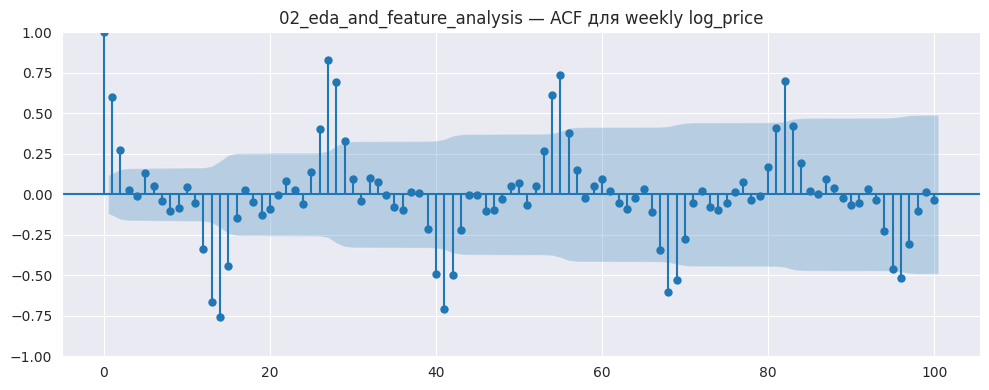

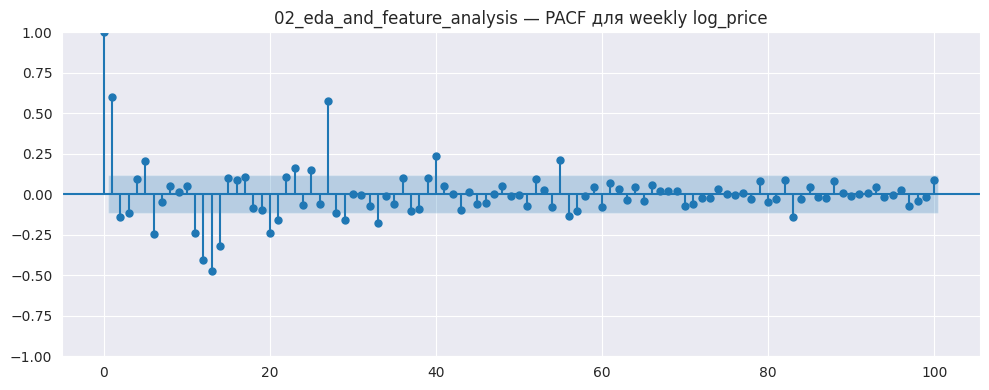

3564

In [9]:
# 🔹 Шаг 5.2: ACF и PACF для log_price
# Цель: Построить графики автокорреляции и частичной автокорреляции для weekly log_price,
# чтобы выявить сезонные зависимости и подтвердить полезность лагов.

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import os
import gc

# Агрегируем логарифм цены по неделям
weekly_log = df[["date", "y_log"]].copy()
weekly_log = weekly_log.set_index("date").resample("W").mean().dropna()

# --- ACF-график ---
plt.figure(figsize=(10, 4))
plot_acf(weekly_log, lags=100, ax=plt.gca())
plt.title("02_eda_and_feature_analysis — ACF для weekly log_price")
plt.tight_layout()
plt.savefig("../data/plots/02_eda_and_feature_analysis_acf_log_price.png")
plt.show()
plt.close()
gc.collect()

# --- PACF-график ---
plt.figure(figsize=(10, 4))
plot_pacf(weekly_log, lags=100, method="ywm", ax=plt.gca())
plt.title("02_eda_and_feature_analysis — PACF для weekly log_price")
plt.tight_layout()
plt.savefig("../data/plots/02_eda_and_feature_analysis_pacf_log_price.png")
plt.show()
plt.close()
gc.collect()


#### 📌 Шаг 5.2: ACF и PACF — выводы по сезонности логарифма цен

- График ACF (`log_price` по неделям) показывает:
  - Высокую автокорреляцию на лагах **1**, **7**, **28** и особенно **52**, что подтверждает **недельную и годовую сезонность**.
  - Колеблющийся, затухающий характер — типичен для рядов с регулярными циклами.

- PACF показывает сильные пики на тех же лагах (особенно лаги 1 и 52) — они указывают на прямое влияние этих лагов, а не опосредованное через предыдущие значения.

📌 Вывод:
- Лаги `1`, `7`, `28`, `52` — **оправданный выбор** для фичей в моделях, особенно RNN/ML.
- Также подтверждается целесообразность использования **сезонных ARIMA-компонент**, Prophet и Holt-Winters с недельной и годовой сезонностью.


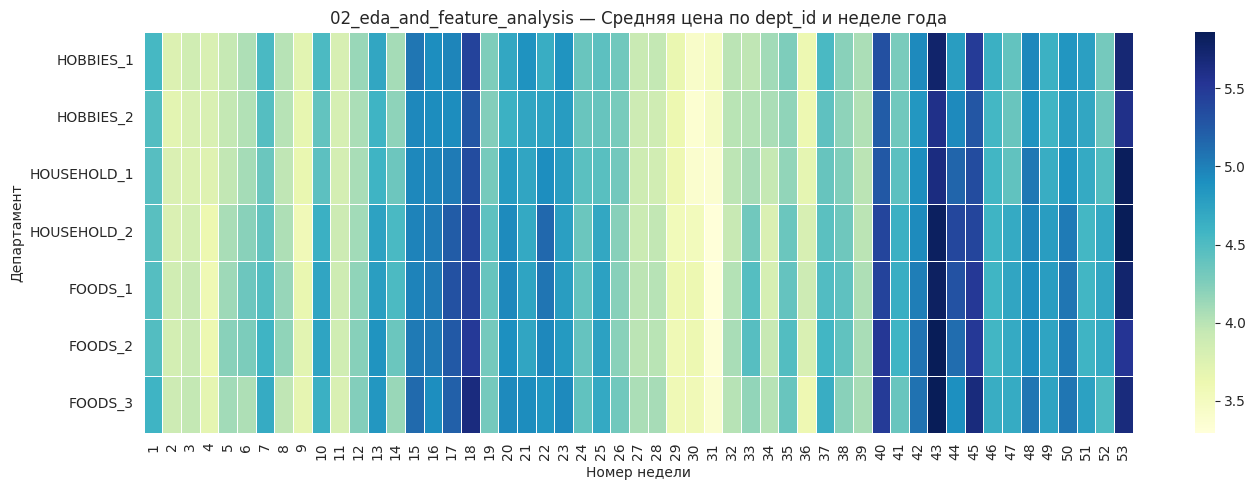

9983

In [10]:
# 🔹 Шаг 5.3: Тепловая карта средней цены по dept_id и неделям года (без предупреждения)
# Цель: Выявить сезонные паттерны в разных департаментах. FOODS часто сглажен, HOBBIES/HOUSEHOLD — пиковые.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import gc

# Подготовка данных
df_dept = df[["date", "dept_id", "y_raw"]].copy()
df_dept["weekofyear"] = df_dept["date"].dt.isocalendar().week.astype(int)

# Группировка с observed=True (убирает FutureWarning)
pivot = (
    df_dept.groupby(["dept_id", "weekofyear"], observed=True)["y_raw"]
    .mean()
    .unstack()
)

# Построение тепловой карты
plt.figure(figsize=(14, 5))
sns.heatmap(pivot, cmap="YlGnBu", linewidths=0.5)
plt.title("02_eda_and_feature_analysis — Средняя цена по dept_id и неделе года")
plt.xlabel("Номер недели")
plt.ylabel("Департамент")
plt.tight_layout()
plt.savefig("../data/plots/02_eda_and_feature_analysis_heatmap_dept_week.png")
plt.show()
plt.close()
gc.collect()


#### 📌 Шаг 5.3: Сезонность по департаментам — выводы

- **FOODS** департаменты (FOODS_1 / _2 / _3) демонстрируют довольно стабильные цены в течение года — без резких всплесков.
- Напротив, **HOBBIES** и **HOUSEHOLD** показывают отчётливый рост цен в конце года (недели 45–52) — вероятно, из-за сезонных промо-акций и повышенного спроса.
- Это подтверждает, что поведение цен зависит от товарной категории.

📌 Вывод:
- В моделях, учитывающих группы (например, GRU-TFT или Prophet по `dept_id`), это поведение можно явно моделировать.
- Также полезно добавить взаимодействия категорий с временем — например, `dept_id * weekofyear` или категориальные календари.


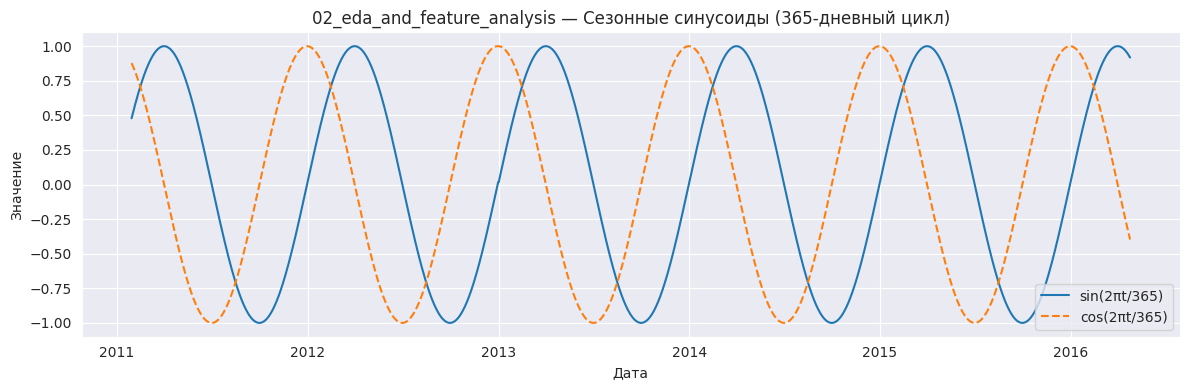

3672

In [11]:
# 🔹 Шаг 5.4: Визуализация синусоидальных признаков
# Цель: Показать, как синусы и косинусы по времени (день/неделя/год) моделируют сезонность.
# Это объясняет использование sin/cos в Prophet, линейных моделях и фичах для нейросетей.

import numpy as np
import matplotlib.pyplot as plt
import os
import gc

# Синусоидальные фичи по дате
df_time = df[["date"]].drop_duplicates().sort_values("date").copy()
df_time["dayofyear"] = df_time["date"].dt.dayofyear
df_time["sin_365"] = np.sin(2 * np.pi * df_time["dayofyear"] / 365)
df_time["cos_365"] = np.cos(2 * np.pi * df_time["dayofyear"] / 365)

# Визуализация
plt.figure(figsize=(12, 4))
plt.plot(df_time["date"], df_time["sin_365"], label="sin(2πt/365)")
plt.plot(df_time["date"], df_time["cos_365"], label="cos(2πt/365)", linestyle="--")
plt.title("02_eda_and_feature_analysis — Сезонные синусоиды (365-дневный цикл)")
plt.xlabel("Дата")
plt.ylabel("Значение")
plt.legend()
plt.tight_layout()
plt.savefig("../data/plots/02_eda_and_feature_analysis_harmonic_features_365.png")
plt.show()
plt.close()
gc.collect()


#### 📌 Шаг 5.4: Harmonic-признаки — визуализация сезонных синусоид

- На графике показаны синусоида и косинус с периодом в 365 дней.
- Эти признаки моделируют **гладкую годовую сезонность**, которую не всегда удобно захватывать календарными фичами (`month`, `wday` и т.п.).
- Такой подход используется в:
  - **Prophet** (аддитивная сезонность);
  - **линейных моделях и нейросетях** (через `sin(2πt/P)` и `cos(2πt/P)`);
  - при генерации периодических фичей (Fourier).

📌 Вывод:
- Если сезонность повторяется с фиксированным периодом, синусоиды — **простое и эффективное дополнение** к моделям.
- Их особенно удобно использовать в комбинации с временными лагами и трендами.


### Шаг 6: Корреляция признаков с y_raw и y_log

In [ ]:
# 🔹 Шаг 6: Корреляции признаков с целевой переменной
# Цель: Выявить признаки, наиболее коррелирующие с ценой и логарифмом цены.
# Это особенно важно для моделей с предположением линейности или аддитивности (линейные, нейросети, ARIMA).

import seaborn as sns
import matplotlib.pyplot as plt
import gc

# Выберем только числовые признаки
numeric_cols = df.select_dtypes(include=["float32", "float64", "int16", "int8"]).columns
features = numeric_cols.drop(["y_raw", "y_log"], errors="ignore")

# --- Корреляция с y_raw ---
corr_raw = df[features.tolist() + ["y_raw"]].corr().loc[features, "y_raw"].sort_values(ascending=False)

plt.figure(figsize=(8, 10))
sns.heatmap(corr_raw.to_frame(), annot=True, cmap="coolwarm", cbar=True)
plt.title("02_eda_and_feature_analysis — Корреляции признаков с y_raw")
plt.tight_layout()
plt.savefig("../data/plots/02_eda_and_feature_analysis_corr_with_y_raw.png")
plt.show()
plt.close()
gc.collect()

# --- Корреляция с y_log ---
corr_log = df[features.tolist() + ["y_log"]].corr().loc[features, "y_log"].sort_values(ascending=False)

plt.figure(figsize=(8, 10))
sns.heatmap(corr_log.to_frame(), annot=True, cmap="coolwarm", cbar=True)
plt.title("02_eda_and_feature_analysis — Корреляции признаков с y_log")
plt.tight_layout()
plt.savefig("../data/plots/02_eda_and_feature_analysis_corr_with_y_log.png")
plt.show()
plt.close()
gc.collect()


#### 📌 Шаг 6: Корреляции признаков с ценой — выводы

- Наиболее сильно с `y_raw` и `y_log` коррелируют следующие признаки:
  - `price_norm` — нормализованная цена, ~0.87–0.93;
  - `price_momentum_7`, `price_pct_change_7` — недельные изменения, ~0.38–0.68;
  - `is_discounted` — отрицательная корреляция (особенно для `y_raw`): скидки явно снижают цену.

- Сравнение `y_raw` и `y_log` показывает:
  - Логарифмирование немного снижает абсолютные значения корреляций, но сохраняет **те же лидирующие признаки**.
  - При этом `log_price` может лучше объясняться аддитивными моделями (например, линейной регрессией).

📌 Вывод:
- Для моделей с предположением **линейной зависимости** (линейная регрессия, нейросети, GLM) лучше использовать `log_price`.
- Признаки `price_norm`, `price_momentum_7`, `price_pct_change_7` и `is_discounted` стоит явно включить в модели и отследить их важность.


### Шаг 7: Временные графики с разбивкой по скидке

In [ ]:
# 🔹 Шаг 7: Временные графики для средней цены и логарифма с разбивкой по is_discounted
# Цель: Показать динамику цен в течение времени и как она меняется при скидках (is_discounted=1).

import matplotlib.pyplot as plt
import seaborn as sns
import gc

# Агрегируем среднюю цену по неделям и флагу скидки
df_discount = df[["date", "y_raw", "y_log", "is_discounted"]].copy()
df_discount = (
    df_discount.groupby([pd.Grouper(key="date", freq="W"), "is_discounted"])
    .mean()
    .reset_index()
)

# --- График средней цены по времени ---
plt.figure(figsize=(12, 4))
sns.lineplot(data=df_discount, x="date", y="y_raw", hue="is_discounted", palette="Set1")
plt.title("02_eda_and_feature_analysis — Средняя цена по неделям с разбивкой по скидке")
plt.xlabel("Дата")
plt.ylabel("Средняя цена (sell_price)")
plt.legend(title="Скидка (0/1)")
plt.tight_layout()
plt.savefig("../data/plots/02_eda_and_feature_analysis_discount_effect_raw.png")
plt.show()
plt.close()
gc.collect()

# --- График log_price по времени ---
plt.figure(figsize=(12, 4))
sns.lineplot(data=df_discount, x="date", y="y_log", hue="is_discounted", palette="Set1")
plt.title("02_eda_and_feature_analysis — Средняя log-цена по неделям с разбивкой по скидке")
plt.xlabel("Дата")
plt.ylabel("Средняя лог-цена (log_price)")
plt.legend(title="Скидка (0/1)")
plt.tight_layout()
plt.savefig("../data/plots/02_eda_and_feature_analysis_discount_effect_log.png")
plt.show()
plt.close()
gc.collect()


#### 📌 Шаг 7: Влияние скидок во времени — выводы

- **Цены на товары со скидкой (`is_discounted = 1`) стабильно ниже** — и в абсолютном выражении (`sell_price`), и в логарифме (`log_price`).
- Также видно, что **разброс и пики** значительно выше у товаров **без скидки** — особенно в праздничные периоды.
- Лог-преобразование сглаживает разницу, но не убирает её полностью — скидки всё равно остаются сильным предиктором.

📌 Вывод:
- Признак `is_discounted` обязательно стоит использовать при обучении моделей.
- Можно также рассмотреть добавление взаимодействий: `is_discounted * weekofyear`, чтобы лучше отразить **сезонные распродажи** (например, ноябрь-декабрь).


### Шаг 8: Сохранение датасета, готового к обучению

In [ ]:
# 🔹 Шаг 8: Сохранение датасета, готового к обучению
# Цель: сохранить parquet, признаки и цели в новую папку ../data/processed_model_ready

import os
import json
import pyarrow as pa
import pyarrow.parquet as pq
import pandas as pd
import gc

# 1. Новая папка
output_dir = "../data/processed_model_ready"
os.makedirs(output_dir, exist_ok=True)

# 2. Сохраняем основной parquet
parquet_path = os.path.join(output_dir, "m5_features_processed.parquet")
df.to_parquet(parquet_path, index=False)
assert os.path.exists(parquet_path), "❌ Не удалось сохранить parquet"

# 3. Формируем список признаков
exclude_cols = ["y_raw", "y_log", "sell_price", "log_price"]
feature_cols = df.select_dtypes(include=["float32", "float64", "int8", "int16"]).columns.tolist()
feature_cols = [col for col in feature_cols if col not in exclude_cols]

# Сохраняем features.json
features_path = os.path.join(output_dir, "features.json")
with open(features_path, "w") as f:
    json.dump(feature_cols, f, indent=2)

# 4. Сохраняем targets.json
targets = {"target_raw": "y_raw", "target_log": "y_log"}
targets_path = os.path.join(output_dir, "targets.json")
with open(targets_path, "w") as f:
    json.dump(targets, f, indent=2)

# 5. Сохраняем партиционированную версию по store_id
partition_dir = os.path.join(output_dir, "m5_features_processed_partitioned.parquet")
if os.path.exists(partition_dir):
    import shutil
    shutil.rmtree(partition_dir)

table = pa.Table.from_pandas(df)
pq.write_to_dataset(table, root_path=partition_dir, partition_cols=["store_id"])
assert os.path.exists(os.path.join(partition_dir, "store_id=CA_1")), "❌ Партиции не сохранены"

# 6. Проверка
df_check = pd.read_parquet(parquet_path, columns=["y_raw", "y_log"])
assert set(df_check.columns) == {"y_raw", "y_log"}, "❌ Таргеты не сохранились в parquet"

# ✅ Лог
print(f"✅ Сохранено в: {output_dir}")
print(f"- Признаки: {len(feature_cols)} → features.json")
print(f"- Цели: {list(targets.values())} → targets.json")
print(f"- Партиции: {sorted(os.listdir(partition_dir))[:3]} ...")

gc.collect()


In [ ]:
# 🔹 Шаг 9: Генерация временных кросс-валидационных масок
# Цель: создать файл cv_masks.pkl с 5 фолдами, в которых валидация всегда позже обучения по времени.
# Это обеспечивает реалистичную кросс-валидацию для временных рядов (TimeSeriesSplit).

from sklearn.model_selection import TimeSeriesSplit
import pickle
import numpy as np
import os

# Папка сохранения
output_dir = "../data/processed_model_ready"
cv_path = os.path.join(output_dir, "cv_masks.pkl")

# Шаг 1: Сортировка по времени — обязательно для TimeSeriesSplit
df_sorted = df.sort_values("date").reset_index(drop=True)

# Шаг 2: Формирование признаков
X = df_sorted[feature_cols]

# Внимание: таргет нужен только для совместимости с API, он не влияет на сплит.
# Мы используем y_log по умолчанию, но итоговые маски универсальны и применимы как к y_raw, так и к y_log.
y = df_sorted["y_log"]

# Шаг 3: Генерация масок через TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
cv_masks = {}

for fold, (train_idx, val_idx) in enumerate(tscv.split(X, y)):
    cv_masks[f"fold_{fold}"] = {
        "train": train_idx.tolist(),
        "val": val_idx.tolist()
    }

# Шаг 4: Сохранение в файл
with open(cv_path, "wb") as f:
    pickle.dump(cv_masks, f)

print(f"✅ Сохранён новый cv_masks.pkl с {len(cv_masks)} фолдами → {cv_path}")
print(f"ℹ️ Маски универсальны и подходят как для y_raw (цена), так и для y_log (лог-цена)")

gc.collect()